In [1]:
import random
from sklearn import linear_model
from matplotlib import pyplot as plt
from collections import defaultdict
import gzip
import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, jaccard_score, mean_squared_error
import matplotlib.pyplot as plt
from datetime import date
from tqdm.notebook import tqdm

In [2]:
def assertFloat(x):
    assert type(float(x)) == float

def assertFloatList(items, N):
    assert len(items) == N
    assert [type(float(x)) for x in items] == [float]*N

In [3]:
answers = {}

In [4]:
def parseData(fname):
    for l in open(fname):
        yield eval(l)

In [5]:
data = list(parseData("./../data/beer_50000.json"))

In [6]:
random.seed(0)
random.shuffle(data)

In [7]:
dataTrain = data[:25000]
dataValid = data[25000:37500]
dataTest = data[37500:]

In [8]:
yTrain = [d['beer/ABV'] > 7 for d in dataTrain]
yValid = [d['beer/ABV'] > 7 for d in dataValid]
yTest = [d['beer/ABV'] > 7 for d in dataTest]

In [9]:
categoryCounts = defaultdict(int)
for d in data:
    categoryCounts[d['beer/style']] += 1

In [10]:
categories = [c for c in categoryCounts if categoryCounts[c] > 1000]

In [11]:
catID = dict(zip(list(categories),range(len(categories))))

In [12]:
df_train = pd.DataFrame(dataTrain)
df_valid = pd.DataFrame(dataValid)
df_test = pd.DataFrame(dataTest)

review_columns = ['review/aroma', 'review/appearance', 'review/palate', 'review/taste', 'review/overall']<br>
sample_df['reviews'] = df[review_columns].values.tolist()

In [13]:
MAX_REVIEW_LENGTH = max(list(map(lambda x: len(x['review/text']), data)))

def apply_feat(df, includeCat = True, includeReview = True, includeLength = True):
    sample_df = pd.DataFrame()
    if includeCat:
        sample_df['beer/style'] = df['beer/style'].apply(lambda x: catID[x] if x in catID else "dummy")
        sample_df = pd.get_dummies(sample_df, columns=['beer/style']).drop(columns=['beer/style_dummy'])
    if includeReview:
        sample_df['review/aroma'] = df['review/aroma']
        sample_df['review/appearance'] = df['review/appearance']
        sample_df['review/palate'] = df['review/palate']
        sample_df['review/taste'] = df['review/taste']
        sample_df['review/overall'] = df['review/overall']
    if includeLength:
        sample_df['review_length'] = df['review/text'].apply(lambda x: len(x)/MAX_REVIEW_LENGTH)
    return sample_df

In [14]:
### Question 1

In [15]:
df_train_1 = apply_feat(df_train, True, False, False)
df_valid_1 = apply_feat(df_valid, True, False, False)
df_test_1 = apply_feat(df_test, True, False, False)

In [16]:
model = linear_model.LogisticRegression(C=10, class_weight="balanced")
model.fit(df_train_1, yTrain)

LogisticRegression(C=10, class_weight='balanced')

In [17]:
validBER = 1 - balanced_accuracy_score(yValid, model.predict(df_valid_1))
testBER = 1 - balanced_accuracy_score(yTest, model.predict(df_test_1))

In [18]:
answers

{}

In [19]:
answers['Q1'] = [validBER, testBER]

In [20]:
assertFloatList(answers['Q1'], 2)

In [21]:
### Question 2

In [22]:
df_train_2 = apply_feat(df_train)
df_valid_2 = apply_feat(df_valid)
df_test_2 = apply_feat(df_test)

In [23]:
model = linear_model.LogisticRegression(C=10, class_weight="balanced", max_iter=1000)
model.fit(df_train_2, yTrain)

LogisticRegression(C=10, class_weight='balanced', max_iter=1000)

In [24]:
validBER = 1 - balanced_accuracy_score(yValid, model.predict(df_valid_2))
testBER = 1 - balanced_accuracy_score(yTest, model.predict(df_test_2))

In [25]:
answers['Q2'] = [validBER, testBER]

In [26]:
assertFloatList(answers['Q2'], 2)

In [27]:
### Question 3

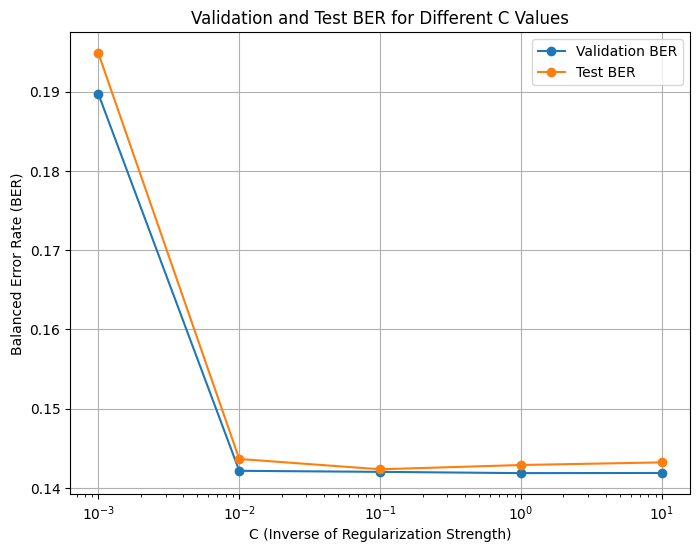

Best C: 1
Best Validation BER: 0.14186381292089734
Best Test BER: 0.1428864422130799


In [28]:
validBER_values = []
testBER_values = []
best_C = None
best_validBER = float('inf')
best_testBER = float('inf')
C_values = [0.001, 0.01, 0.1, 1, 10]
for c in C_values:
    model = linear_model.LogisticRegression(C=c, class_weight="balanced", max_iter=1000)
    model.fit(df_train_2, yTrain)

    validBER = 1 - balanced_accuracy_score(yValid, model.predict(df_valid_2))
    testBER = 1 - balanced_accuracy_score(yTest, model.predict(df_test_2))
    
    validBER_values.append(validBER)
    testBER_values.append(testBER)

    if validBER < best_validBER:
        best_C = c
        best_validBER = validBER
        best_testBER = testBER

plt.figure(figsize=(8, 6))
plt.semilogx(C_values, validBER_values, label='Validation BER', marker='o')
plt.semilogx(C_values, testBER_values, label='Test BER', marker='o')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Balanced Error Rate (BER)')
plt.legend()
plt.title('Validation and Test BER for Different C Values')
plt.grid(True)

plt.show()

print("Best C:", best_C)
print("Best Validation BER:", best_validBER)
print("Best Test BER:", best_testBER)

In [29]:
answers['Q3'] = [best_C, best_testBER, best_validBER]

In [30]:
assertFloatList(answers['Q3'], 3)

In [31]:
### Question 4

In [32]:
# No cat
train_data = apply_feat(df_train, False, True, True)
test_data = apply_feat(df_test, False, True, True)
model = linear_model.LogisticRegression(C=c, class_weight="balanced", max_iter=1000)
model.fit(train_data, yTrain)
testBER_noCat = 1 - balanced_accuracy_score(yTest, model.predict(test_data))

In [33]:
# No review
train_data = apply_feat(df_train, True, False, True)
test_data = apply_feat(df_test, True, False, True)
model = linear_model.LogisticRegression(C=c, class_weight="balanced", max_iter=1000)
model.fit(train_data, yTrain)
testBER_noReview = 1 - balanced_accuracy_score(yTest, model.predict(test_data))

In [34]:
# No length
train_data = apply_feat(df_train, True, True, False)
test_data = apply_feat(df_test, True, True, False)
model = linear_model.LogisticRegression(C=c, class_weight="balanced", max_iter=1000)
model.fit(train_data, yTrain)
testBER_noLength = 1 - balanced_accuracy_score(yTest, model.predict(test_data))

In [35]:
answers['Q4'] = [testBER_noCat, testBER_noReview, testBER_noLength]

In [36]:
assertFloatList(answers['Q4'], 3)

In [37]:
### Question 5

In [38]:
path = "./../data/amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz"
f = gzip.open(path, 'rt', encoding="utf8")

header = f.readline()
header = header.strip().split('\t')

In [39]:
dataset = []

for line in f:
    fields = line.strip().split('\t')
    d = dict(zip(header, fields))
    d['star_rating'] = int(d['star_rating'])
    d['helpful_votes'] = int(d['helpful_votes'])
    d['total_votes'] = int(d['total_votes'])
    dataset.append(d)

In [40]:
dataTrain = dataset[:int(len(dataset)*0.9)]
dataTest = dataset[int(len(dataset)*0.9):]

In [41]:
usersPerItem = defaultdict (set)
itemsPerUser = defaultdict (set)

for d in dataset:
    user , item = d['customer_id'], d['product_id']
    usersPerItem [item ]. add(user)
    itemsPerUser [user ]. add(item)

In [42]:
def Jaccard(s1 , s2):
    numerator = len(s1. intersection (s2))
    denominator = len(s1.union(s2))
    return numerator / denominator

In [43]:
def mostSimilar (i, K): 
    similarities = []
    users = usersPerItem [i] # Users who have purchased i
    for j in usersPerItem : # Compute similarity against each
        if j == i: continue
        sim = Jaccard(users , usersPerItem [j])
        similarities .append ((sim ,j))
    similarities .sort(reverse=True) # Sort to find the most
    return similarities [:K]

In [44]:
top_10_similar_items = mostSimilar('B0006VMBHI', 10)

In [45]:
answers['Q5'] = ms = top_10_similar_items 

In [46]:
assertFloatList([m[0] for m in ms], 10)

In [47]:
### Question 6

In [48]:
reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)
ratingMean = sum([d['star_rating'] for d in dataTrain]) / len(dataTrain)
labels = [d['star_rating'] for d in dataset]
ratingDict = {}
itemNames = {}
userAverages = {}
itemAverages = {}

for d in dataset:
    user,item = d['customer_id'], d['product_id']
    ratingDict[(user,item)] = d['star_rating']

for d in dataTrain:
    user,item = d['customer_id'], d['product_id']
    usersPerItem[item].add(user)
    itemsPerUser[user].add(item)
    itemNames[item] = d['product_title']
    reviewsPerUser[user].append(d)
    reviewsPerItem[item].append(d)

for u in itemsPerUser:
    rs = [ratingDict[(u,i)] for i in itemsPerUser[u]]
    userAverages[u] = sum(rs) / len(rs)
    
for i in usersPerItem:
    rs = [ratingDict[(u,i)] for u in usersPerItem[i]]
    itemAverages[i] = sum(rs) / len(rs)

In [49]:
len(reviewsPerUser)

514286

In [50]:
def predictRating3(user,item):
    ratings = []
    similarities = []
    for d in reviewsPerUser[user]:
        i2 = d['product_id']
        if i2 == item: continue
        ratings.append(d['star_rating'] - itemAverages[i2])
        similarities.append(Jaccard(usersPerItem[item],usersPerItem[i2]))
    if (sum(similarities) > 0):
        weightedRatings = [(x*y) for x,y in zip(ratings,similarities)]
        return itemAverages[item] + sum(weightedRatings) / sum(similarities)
    else:
        return ratingMean

In [51]:
simPredictions = [predictRating3(d['customer_id'], d['product_id']) for d in tqdm(dataTest)]

  0%|          | 0/90477 [00:00<?, ?it/s]

In [52]:
answers['Q6'] = mean_squared_error(simPredictions, labels[int(len(dataset)*0.9):])

In [53]:
answers

{'Q1': [0.16130237168160533, 0.1607838024608832],
 'Q2': [0.14188307936778066, 0.14321963062514476],
 'Q3': [1, 0.1428864422130799, 0.14186381292089734],
 'Q4': [0.31297207540848004, 0.16114394628041007, 0.14637774058770103],
 'Q5': [(0.028446389496717725, 'B00006I5SD'),
  (0.01694915254237288, 'B00006I5SB'),
  (0.015065913370998116, 'B000AJR482'),
  (0.014204545454545454, 'B00E7MVP3S'),
  (0.008955223880597015, 'B001255YL2'),
  (0.008849557522123894, 'B003EIRVO8'),
  (0.008333333333333333, 'B0015VEZ22'),
  (0.00821917808219178, 'B00006I5UH'),
  (0.008021390374331552, 'B00008BWM7'),
  (0.007656967840735069, 'B000H2BC4E')],
 'Q6': 1.627536046373963}

In [54]:
assertFloat(answers['Q6'])

In [55]:
### Question 7

In [56]:
# Generating score from timestamps
review_dates = list(map(lambda x: date.fromisoformat(x['review_date']), dataset))
time_diff = max(review_dates) - min(review_dates)
min_review_date = min(review_dates)
timestamp_avgs = defaultdict(dict)

def generateScoreFromTimeStamp(timestamp):
    """ Generates a score biasing more recent reviews
    """
    return (date.fromisoformat(timestamp) - min_review_date) / time_diff

for d in dataset:
    user, item = d['customer_id'], d['product_id']
    timestamp_avgs[user][item] = generateScoreFromTimeStamp(d['review_date'])

In [57]:
def predictRatingDecay(user,item):
    ratings = []
    similarities = []
    timestamps = []
    for d in reviewsPerUser[user]:
        i2 = d['product_id']
        if i2 == item: continue
        ratings.append(d['star_rating'] - itemAverages[i2])
        similarities.append(Jaccard(usersPerItem[item],usersPerItem[i2]))
        timestamps.append(timestamp_avgs[d['customer_id']][d['product_id']])
    if (sum(similarities) > 0):
        weightedRatings = [(x*y*z) for x,y,z in zip(ratings,similarities,timestamps)]
        return itemAverages[item] + sum(weightedRatings) / sum(similarities)
    else:
        return ratingMean

In [64]:
simPredictionsDecay = [predictRatingDecay(d['customer_id'], d['product_id']) for d in tqdm(dataTest)]
new_mse = mean_squared_error(simPredictionsDecay, labels[int(len(dataset)*0.9):])

  0%|          | 0/90477 [00:00<?, ?it/s]

In [65]:
msg = '''
    I created a function to calculate the time delata from the oldest and compared it to the relative to max time delta overall
    to compute the scores. After adding it to the weightedRatings, It reduced the MSE by 0.04
'''

In [66]:
answers['Q7'] = [msg, new_mse]

In [67]:
assertFloat(answers['Q7'][1])

In [68]:
f = open("answers_hw2.txt", 'w')
f.write(str(answers) + '\n')
f.close()